In [3]:
import numpy as np
import matplotlib.pyplot as plt

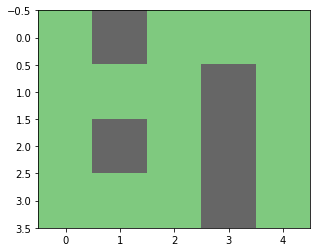

In [156]:
maze_list = [[0, 1, 0, 0, 0],
             [0, 0, 0, 1, 0],
             [0, 1, 0, 1, 0], 
             [0, 0, 0, 1, 0]]
maze_arr = np.array(maze_list)
plt.imshow(maze_arr, cmap = 'Accent')

In [157]:
def func(maze_arr):
    graph_dict = {}
    near_coords = []
    x, y = 0, 0
    for row in maze_arr:
        for column in row:
            if maze_arr[y, x] != 1:
                if y != 0 and maze_arr[y-1, x] != 1:
                    near_coords.append((x, y-1))

                if y != len(maze_arr)-1 and maze_arr[y+1, x] != 1:
                    near_coords.append((x, y+1))

                if x != 0 and maze_arr[y, x-1] != 1:
                    near_coords.append((x-1, y))

                if x != len(maze_arr[0])-1 and maze_arr[y, x+1] != 1: 
                    near_coords.append((x+1, y))

                graph_dict[(x, y)] = near_coords

                near_coords = []
            x += 1
        y += 1
        x = 0
    
    
    return graph_dict

In [158]:


func(maze_arr)

{(0, 0): [(0, 1)],
 (2, 0): [(2, 1), (3, 0)],
 (3, 0): [(2, 0), (4, 0)],
 (4, 0): [(4, 1), (3, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 1)],
 (1, 1): [(0, 1), (2, 1)],
 (2, 1): [(2, 0), (2, 2), (1, 1)],
 (4, 1): [(4, 0), (4, 2)],
 (0, 2): [(0, 1), (0, 3)],
 (2, 2): [(2, 1), (2, 3)],
 (4, 2): [(4, 1), (4, 3)],
 (0, 3): [(0, 2), (1, 3)],
 (1, 3): [(0, 3), (2, 3)],
 (2, 3): [(2, 2), (1, 3)],
 (4, 3): [(4, 2)]}

In [166]:
def min_distance(graph_dict):
    current_nodes = [(0, 0)]
    next_nodes = []
    path = []
    while (4, 3) not in current_nodes:
        next_nodes = []
        for node in current_nodes:
            path.append(node)
            for next_node in graph_dict[node]:
                if next_node not in path:
                    next_nodes.append(next_node)
        current_nodes = next_nodes
        print(current_nodes)
    return path

In [167]:
min_distance(func(maze_arr))

[(0, 1)]
[(0, 2), (1, 1)]
[(0, 3), (2, 1)]
[(1, 3), (2, 0), (2, 2)]
[(2, 3), (3, 0), (2, 3)]
[(4, 0)]
[(4, 1)]
[(4, 2)]
[(4, 3)]


[(0, 0),
 (0, 1),
 (0, 2),
 (1, 1),
 (0, 3),
 (2, 1),
 (1, 3),
 (2, 0),
 (2, 2),
 (2, 3),
 (3, 0),
 (2, 3),
 (4, 0),
 (4, 1),
 (4, 2)]

In [161]:
d = min_distance(func(maze_arr))
row = 0
column = 0
while row < len(maze_arr):
    while column < len(maze_arr[row]):
        if (column, row) in d:
            maze_arr[row, column] = 2 
        column += 1
    column = 0
    row += 1

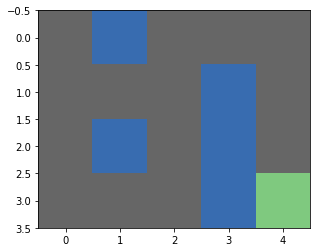

In [162]:
plt.imshow(maze_arr, cmap = 'Accent')